# Statistical Analyses

There are two types of statistical analyses that can be performed on the data. The first is a univariate analysis, which is an analysis of a single variable. The second is a bivariate analysis, which is an analysis of two variables. 

## Univariate Analysis

The univariate analysis is an analysis of a single variable. The purpose of this analysis is to describe the data and find patterns in the data. The univariate analysis can be performed using the following statistical measures:

1. Mean
2. Median
3. Mode
4. Range
5. Variance
6. Standard Deviation
7. Skewness
8. Kurtosis

> The mean is the average of the data. The median is the middle value of the data. The mode is the most common value in the data. The range is the difference between the maximum and minimum values of the data. The variance is the average of the squared differences between the data and the mean. The standard deviation is the square root of the variance. The skewness is a measure of the asymmetry of the data. The kurtosis is a measure of the peakedness of the data.

## Bivariate Analysis

The bivariate analysis is an analysis of two variables. The purpose of this analysis is to find relationships between the two variables. The bivariate analysis can be performed using the following statistical measures:

1. Correlation
2. Covariance
3. Regression
4. ANOVA
5. Chi-Square
6. T-Test
7. Mann-Whitney U Test
8. Wilcoxon Signed-Rank Test
9. Kruskal-Wallis Test
10. Friedman Test
11. Spearman's Rank Correlation
12. Kendall's Tau
13. Pearson's Chi-Square Test

> The correlation is a measure of the strength and direction of the relationship between the two variables. The covariance is a measure of the strength of the relationship between the two variables. The regression is a model that predicts the value of one variable based on the value of the other variable. The ANOVA is a test that compares the means of two or more groups. The Chi-Square is a test that compares the observed and expected frequencies of two or more groups. The T-Test is a test that compares the means of two groups. The Mann-Whitney U Test is a test that compares the medians of two groups. The Wilcoxon Signed-Rank Test is a test that compares the medians of two related groups. The Kruskal-Wallis Test is a test that compares the medians of two or more groups. The Friedman Test is a test that compares the medians of two or more related groups. Spearman's Rank Correlation is a measure of the strength and direction of the relationship between two variables. Kendall's Tau is a measure of the strength and direction of the relationship between two variables. Pearson's Chi-Square Test is a test that compares the observed and expected frequencies of two or more groups.

## Conclusion

In conclusion, the univariate analysis is an analysis of a single variable, and the bivariate analysis is an analysis of two variables. The univariate analysis can be performed using the mean, median, mode, range, variance, standard deviation, skewness, and kurtosis. The bivariate analysis can be performed using the correlation, covariance, regression, ANOVA, Chi-Square, T-Test, Mann-Whitney U Test, Wilcoxon Signed-Rank Test, Kruskal-Wallis Test, Friedman Test, Spearman's Rank Correlation, Kendall's Tau, and Pearson's Chi-Square Test.

The univariate analysis is used to describe the data and find patterns in the data, while the bivariate analysis is used to find relationships between two variables. Both analyses are important in understanding the data and making informed decisions based on the data.

The statistical analyses can be performed using statistical software such as R, Python, or SPSS. The results of the analyses can be presented in tables, graphs, or charts to help visualize the data and communicate the findings to others.

In this notebook, we will perform a several tests to understand the data and make informed decisions based on the data.

So let's start with the analysis.

## 1. Chi-square Test

In [1]:
# improt libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
# load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


`Null Hypothesis:` There is no significant association between gender ('sex') and survival ('survived') on the Titanic. This means any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship.

`Alternative Hypothesis:` There is a significant association between gender ('sex') and survival ('survived') on the Titanic. This implies that the differences in survival rates are not just due to chance but are influenced by the passengers' gender.

In [3]:
# Create a contigency table
contigency_table = pd.crosstab(df['sex'], df['survived'])
contigency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [4]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


As the p_value in this test is `P-value: 1.1973570627755645e-58` which is far less than `0.05`, we reject the null hypothesis.

---
## 2. Normal Distribution Test

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

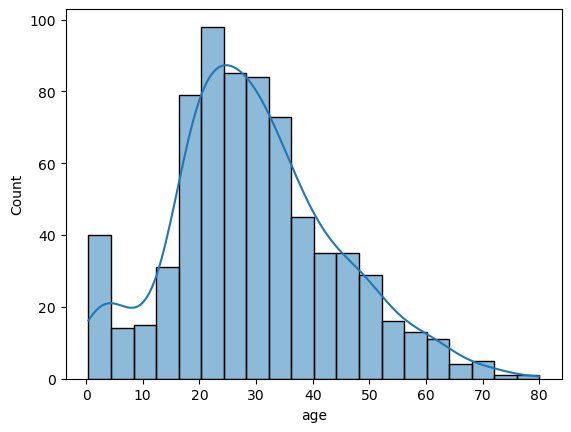

In [6]:
# graphical Method
sns.histplot(data=df, x='age', kde=True)

# shapiro wilk Test on Normal Distribution Gaussian Distribution
# Null Hypothesis: The data is normally distributed.
# Alternative Hypothesis: Data is not normally distributed.

In [7]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['age'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.0, Sample looks Gaussian/Normally Distributed (fail to reject H0)


<Axes: xlabel='fare', ylabel='Count'>

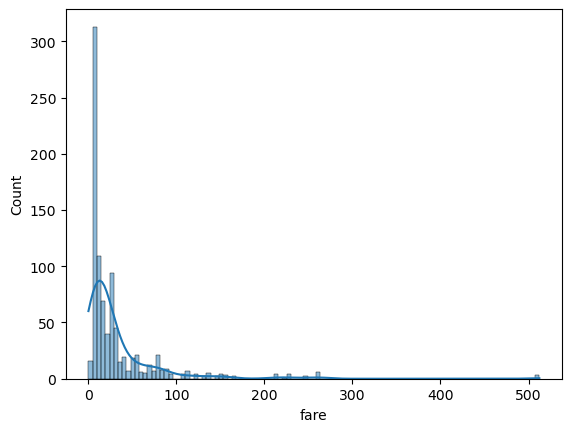

In [8]:
sns.histplot(data=df, x='fare', kde=True)

In [9]:
statistic, p = stats.shapiro(df['fare'])
# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.0789998175301091e-43, Sample does not look Gaussian/Normally Distributed (reject H0)


---

# t-Test

Choosing between a Z-test and a T-test for hypothesis testing depends primarily on two factors: the sample size and whether the population standard deviation is known. 

### Z-test:
1. **When to Use**:
   - The population standard deviation is known.
   - The sample size is large (commonly, n ≥ 30). With large samples, the sample standard deviation approximates the population standard deviation.
   - For proportions (e.g., testing the proportion of success in a sample against a known population proportion).

2. **Characteristics**:
   - Based on the Z-distribution, which is a normal distribution as n becomes large.
   - More commonly used in quality control and standardization processes.

### T-test:
1. **When to Use**:
   - The population standard deviation is unknown.
   - The sample size is small (typically, n < 30).
   - Suitable for cases where the data is approximately normally distributed, especially in small samples.

2. **Characteristics**:
   - Based on the T-distribution, which accounts for the additional uncertainty due to the estimation of the population standard deviation from the sample.
   - T-distribution becomes closer to the normal distribution as the sample size increases.

### General Guidelines:
- **Large Samples**: With large sample sizes, the T-test and Z-test will give similar results. This is because the T-distribution approaches the normal distribution as the sample size increases.
- **Small Samples**: When the sample size is small and the population standard deviation is unknown, the T-test is generally the appropriate choice due to its ability to account for the uncertainty in the standard deviation estimate.
- **Unknown Population Standard Deviation**: Even with large samples, if the population standard deviation is unknown and cannot be reliably estimated, a T-test is usually preferred.

### Conclusion:
- Use the **Z-test** for large sample sizes or when the population standard deviation is known.
- Use the **T-test** for small sample sizes or when the population standard deviation is unknown.

In practice, the T-test is more commonly used in many research scenarios due to the rarity of knowing the population standard deviation and often dealing with smaller sample sizes.

Ham is notebook main t-test dekhen gay.

1. One-sample T-test

In [16]:
import scipy.stats as stats

# sample data
x = [1, 2, 3, 4, 5]

# known population mean
mu = 4

# perform one sample t-test
t_statistic, p = stats.ttest_1samp(x, mu)

# print results
print('t-statistic:', t_statistic)
print('p-value:', p)

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to population mean (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (reject H0)')

t-statistic: -1.414213562373095
p-value: 0.23019964108049873
p-value: 0.23019964108049873, Sample mean is equal to population mean (fail to reject H0)


2.  Two Sample T-test (independent)

In [17]:
import scipy.stats as stats

# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
t_stat, p = stats.ttest_ind(group1, group2, equal_var=True)

print("t-statistic:", t_stat)
print("p-value:", p)

if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to group2 mean (fail to reject H0)')
else:
    print(f'p-value: {p}, group1 mean is not equal to group2 mean (reject H0)')


t-statistic: 1.8482055087756457
p-value: 0.10175647371829193
p-value: 0.10175647371829193, group1 mean is equal to group2 mean (fail to reject H0)


3. Paired Sample t-test

In [18]:
import scipy.stats as stats

# sample data
before = [2, 3, 4, 5, 6]
after = [3, 4, 5, 6, 7]

# perform paired sample t-test
t_stat, p_val = stats.ttest_rel(before, after)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, before mean is equal to after mean (fail to reject H0)')
else:
    print(f'p-value: {p_val}, before mean is not equal to after mean (reject H0)')


t-statistic: -inf
p-value: 0.0
p-value: 0.0, before mean is not equal to after mean (reject H0)


# Test for Homogeniety

## 1.  Levene's Test

In [20]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Levene's Test
w_stat, p_val = stats.levene(group1, group2)

print("w-statistic:", w_stat)
print("p-value:", p_val)

# print the results based on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')


w-statistic: 0.44651162790697696
p-value: 0.5228039334796065
p-value: 0.5228039334796065, Variances are equal (fail to reject H0)


## 2. Bartlett's Test

In [21]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Bartlett's Test
t_stat, p_val = stats.bartlett(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')


t-statistic: 0.24050679805097827
p-value: 0.6238403179343277
p-value: 0.6238403179343277, Variances are equal (fail to reject H0)


# ANOVA
Analysis of Variance

## 1. ONe-way ANOVA

In [22]:
import scipy.stats as stats

# Sample data

a = [2.3, 3.4, 4.5, 2.3, 3.4]
b = [11.2, 12.2, 13.2, 12.2, 12.3]
c = [22.3, 23.4, 24.5, 22.3, 23.4]

# perform one-way ANOVA
f_stat, p_val = stats.f_oneway(a, b, c)

# print the results base on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Means are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Means are not equal (reject H0)')

p-value: 4.279979561060641e-13, Means are not equal (reject H0)
